# Titanic Data set

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [166]:
#reading data from csv file
local_address="C:\\Users\\Yogi\\Downloads\\"
titanic_dataset = pd.read_csv(local_address+"titanic1.csv")
titanic_dataset.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Unnamed: 8,Unnamed: 9
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0,7.2500,NaN,NaN
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0,71.2833,NaN,NaN
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0,7.9250,NaN,NaN
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0,53.1000,NaN,NaN
4,0,3.0,Mr. William Henry Allen,male,35.0,0.0,0,8.0500,NaN,0.0


In [167]:
# dropping uncessary columns
titanic_dataset.drop(["Unnamed: 8","Unnamed: 9","Name"],axis=1,inplace=True)

#titanic_dataset.describe()
titanic_dataset.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,male,22.0,1.0,0,7.2500
1,1,1.0,female,38.0,1.0,0,71.2833
2,1,3.0,female,26.0,0.0,0,7.9250
3,1,1.0,female,35.0,1.0,0,53.1000
4,0,3.0,male,35.0,0.0,0,8.0500


In [168]:
#checking null values
#titanic_dataset.isnull().sum()

#dropping null values
titanic_dataset.dropna(inplace=True)

titanic_dataset.describe()


,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.00000
mean,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.836662,14.121908,1.104669,0.807466,49.78204
min,1.000000,0.420000,0.000000,0.000000,0.00000
25%,2.000000,20.250000,0.000000,0.000000,7.92500
50%,3.000000,28.000000,0.000000,0.000000,14.45420
75%,3.000000,38.000000,1.000000,0.000000,31.13750
max,3.000000,80.000000,8.000000,6.000000,512.32920


<AxesSubplot:>

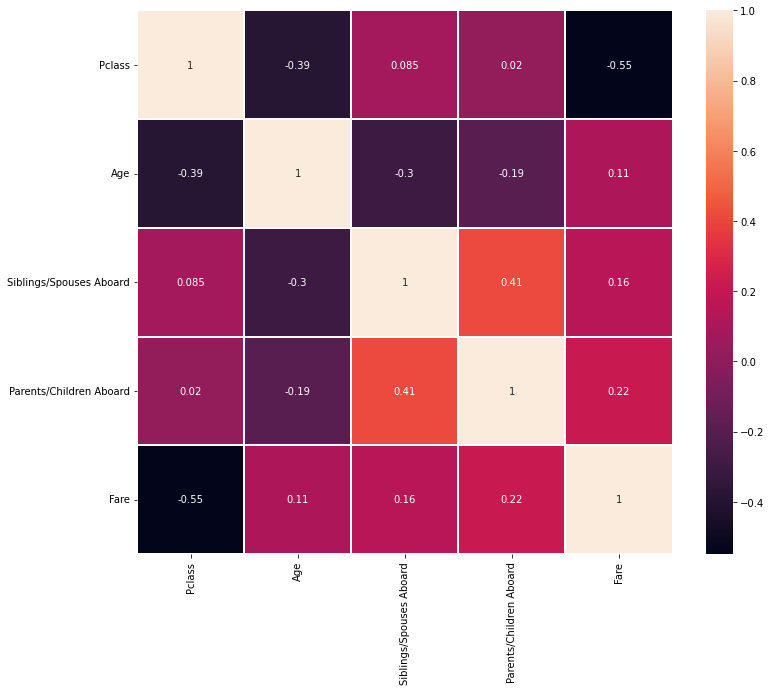

In [234]:
#checking correaltion with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
cor = titanic_dataset.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,yticklabels=True,linewidth=.1,annot=True)

In [169]:
#one hotencoding for sex column
sex= pd.get_dummies(titanic_dataset["Sex"],drop_first=True)

In [171]:
#merging dummies data with titanic dataset
titanic = pd.concat([titanic_dataset,sex],axis=1)

titanic.head()
#droping sex column 
titanic.drop(["Sex"], axis=1,inplace =True)

In [172]:
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3.0,22.0,1.0,0,7.2500,1
1,1,1.0,38.0,1.0,0,71.2833,0
2,1,3.0,26.0,0.0,0,7.9250,0
3,1,1.0,35.0,1.0,0,53.1000,0
4,0,3.0,35.0,0.0,0,8.0500,1


In [212]:
# seperating data in X and Y frames
X= titanic.drop("Survived",axis=1)
y= titanic["Survived"]


In [219]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [235]:
# splitting data in test train data sets
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.10,shuffle=True)

In [236]:
#from sklearn.ensemble import RandomForestClassifier
#forest = RandomForestClassifier(n_estimators =50 ,criterion = 'entropy', random_state = 0)
#forest.fit(X_train, y_train)
#prd= forest.predict(X_test)

# creating logistic regression model and trainning it

from sklearn import datasets, linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [237]:
# checking accuracy on test data 
model.score(X_test, y_test)

0.898876404494382

In [238]:
# checking accuracy on train data 
model.score(X_train, y_train)

0.7982456140350878

In [239]:
from sklearn import metrics as  m
print("Performance of logistic regression on Titanic Dataset\n\n",m.classification_report(y_test, model.predict(X_test)))

Performance of logistic regression on Titanic Dataset

               precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.95      0.72      0.82        29

    accuracy                           0.90        89
   macro avg       0.92      0.85      0.88        89
weighted avg       0.90      0.90      0.89        89

